In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib.ticker import NullFormatter


# read csv
csv = "Billionaire_Data.csv"
data_df = pd.read_csv(csv)

In [2]:
data_df["gdp_country"] = data_df["gdp_country"].str.replace("$", "")
data_df["gdp_country"] = data_df["gdp_country"].str.replace(",", "")
data_df["gdp_country"]=data_df["gdp_country"].astype(float)

In [3]:
data_df["finalWorth"]/=1000
data_df['gdp_country']/=1000000000
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.518274,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.700000,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
#Compare the net worth of billionaires who are selfmade vs those with inherited wealth
data_df["selfMade"] = data_df["selfMade"].map({True:"Selfmade", False:"Inherited"})

#Number of selfmade billionaires
num_selfmade = data_df.selfMade.value_counts().loc["Selfmade"]
num_selfmade

1812

In [5]:
#number of billionaires with inherited wealth
num_inherited = data_df.selfMade.value_counts().loc["Inherited"]
num_inherited

828

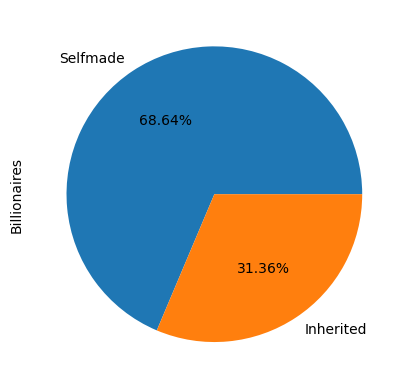

In [6]:
#chart comparing selfmade to inherited
data_df.selfMade.value_counts().plot.pie(autopct='%.2f%%', ylabel='Billionaires');

In [8]:
columns = ["selfMade",
           "finalWorth"]
cut_df = pd.DataFrame(data_df, columns=columns)
# cut_df.dtypes
worth_group = cut_df.groupby(["selfMade"]).sum()
worth_group

,finalWorth
selfMade,
Inherited,4115.5
Selfmade,8091.3


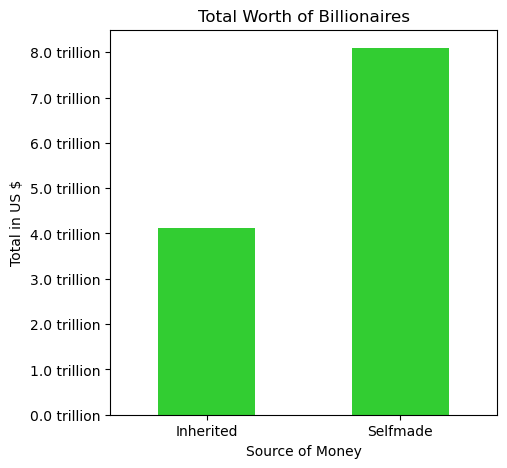

In [17]:
def formatter(x, pos):
    return str(round(x / 1000, 1)) + " trillion"

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())

worth_group["finalWorth"].plot.bar(ylabel='Total in US $', rot=0, xlabel="Source of Money",title= "Total Worth of Billionaires", color="limegreen", figsize=(5,5));


In [11]:
columns = ["selfMade",
           "finalWorth"]
cut_df = pd.DataFrame(data_df, columns=columns)
# cut_df.dtypes
mean_group = cut_df.groupby(["selfMade"]).mean()
mean_group

,finalWorth
selfMade,
Inherited,4.970411
Selfmade,4.465397


In [13]:
columns = ["selfMade",
           "finalWorth"]
cut_df = pd.DataFrame(data_df, columns=columns)
# cut_df.dtypes
med_group = cut_df.groupby(["selfMade"]).median()
med_group

,finalWorth
selfMade,
Inherited,2.6
Selfmade,2.2


Text(0, 0.5, 'Net Worth')

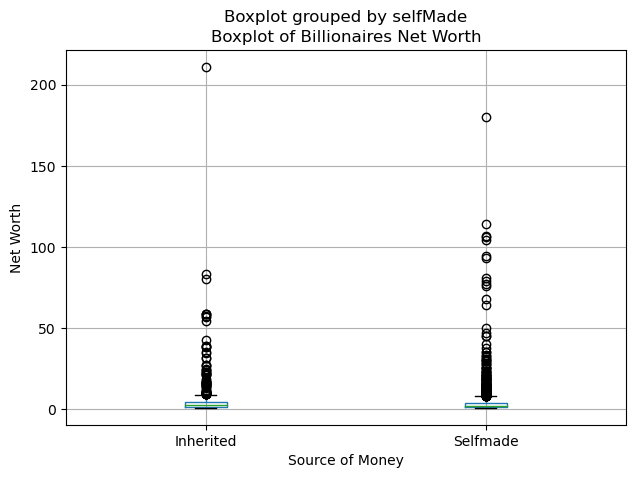

In [14]:
data_df.boxplot(by='selfMade', column='finalWorth', grid=True, figsize=(7,5))
plt.title("Boxplot of Billionaires Net Worth")
plt.xlabel('Source of Money')
plt.ylabel('Net Worth')
